<h1 style='text-align: center'>Finding the Best Distribution that Fits the Data</h1>

We have velocity data of a turbine in an excel file.
We need to find the best fitted distribution on these velocity data to create random variable and find the power of turbine.
According to the below picture, the histogram of the velocity is created in the Matlab. 
Then by using the 'Distribution Fitter' in Matlab, applied various distributions.
By looking at these four distributions, we could not detect the best fitted one on our data.
So we tried to implement some methods inside the python to find the best one.
In the following steps we explain these methods.


<img src="files/distributions_on_velocity_matlab.png" alt="K-S test table p-value">

In [181]:
import pandas as pd

data = pd.read_excel('files\wind_data.xls')
df = pd.DataFrame(data)
df

,velocity min 85,velocity max 85,velocity min 62,velocity max 62,velocity min 41.5,velocity max 41.5
0,83,91,74,82,56,65
1,83,89,72,82,54,65
2,77,85,69,77,52,61
3,79,89,71,79,54,63
4,82,95,72,83,54,69
...,...,...,...,...,...,...
62127,41,62,39,60,38,57
62128,46,66,44,62,39,59
62129,54,80,50,75,44,74
62130,57,76,57,69,54,74


The data we use in our exersise are inside the 'velocity max 41.5' column.
At the first we need to delete negative and zero values for velocity and only keep positive values.

In [52]:
dd = df.loc[:]['velocity max 41.5']
dd = dd[dd > 0]
dd.sort_values()

50431      3
8644       4
59730      4
16392      4
7033       4
        ... 
21214    239
15160    241
21220    241
15159    245
21276    249
Name: velocity max 41.5, Length: 61935, dtype: int64

So this column contains 61935 data points. <br>
Before fitting any distributions to our data, it’s wise to first plot a histogram of our data and visually observe it:

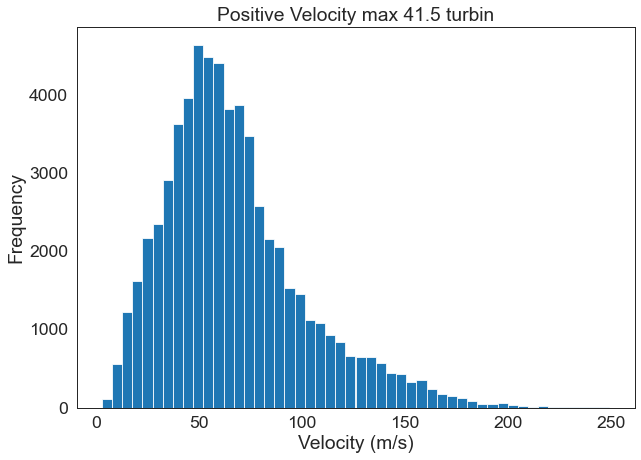

In [147]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dd, bins=50)
plt.title('Positive Velocity max 41.5 turbin')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Frequency')
plt.show()

<h2>FITTER library in python</h2>

We came across the <a href='https://fitter.readthedocs.io/'>Fitter</a> library. This library is a lifesaver. It uses Scipy library in the backend for distribution fitting and supports 80 distributions, which is huge.

<h5>Fitting distributions</h5>
<p>The next step is to start fitting different distributions and finding out the best-suited distribution for the data.</p>
The steps are:
<ol>
    <li>Create a Fitter instance by calling the <code>Fitter( )</code></li>
<li>Supply the data (velocity max 41.5) and distributions list if you have a basic idea of the distributions that might fit your data</li>
    <li>Apply the <code>.fit( )</code> method</li>
    <li>Generate the fitted distribution summary using <code>.summary( )</code> method</li>
</ol>    
Before getting into distribution fitting, let’s review a simple handful of theories. There are a couple of methods to estimate parameters of a distribution based on the given data.
<ul>
    <li><a href='https://en.wikipedia.org/wiki/Maximum_likelihood_estimation'>Maximum Likelihood Estimation (MLE)</a>,</li>
    <li><a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion (AIC)</a>,</li>
    <li><a href='https://en.wikipedia.org/wiki/Posterior_probability'>Maximizing Bayesian Posterior Probability</a>, etc.</li> 
</ul>
<p>SciPy and Fitting perform parameter estimation using MLE <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html'>(documentation).</a></p>
    

<h5>Common distributions</h5>
<p>Before we generate samples and fit distributions, one important thing to note is that the Fitter library also has a <code>get_common_distribution( )</code> method which includes 10 common distributions. This could come in handy when you don’t have any idea about the distributions that might fit your data.</p>

In [86]:
from fitter import Fitter, get_common_distributions, get_distributions
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

By using the <b>Fitter Distribution</b> tool in Matlab we found <b>Log Logistic</b>, <b>Gamma</b>, <b>Burr</b> and <b>Generalized Extreme Value</b> which are close to our data.
So we added these distributions to the common distribution found by Fitter library to check which one are better fitted.

In [92]:
distributions = ['cauchy', 'chi2', 'expon', 'exponpow', 'gamma', 'lognorm', 'norm', 'powerlaw', 'rayleigh', 'uniform', 
                 'genextreme', 'burr', 'logistic', 'fisk']

,sumsquare_error,aic,bic,kl_div
burr,0.000181,1334.402590,-1.217106e+06,inf
fisk,0.000182,1324.858025,-1.216857e+06,inf
genextreme,0.000200,1355.257509,-1.210739e+06,inf
lognorm,0.000209,1356.852995,-1.208122e+06,inf
gamma,0.000226,1376.379261,-1.203188e+06,inf


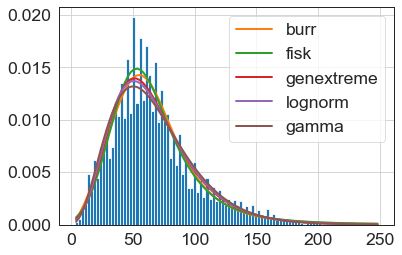

In [93]:
from scipy import stats
from fitter import Fitter
f = Fitter(dd, distributions=distributions)
f.fit()
f.summary()

<p>Here, we have fitted 14 different distributions. Calling the <code>summary( )</code> method on the fitted object shows the different distributions and fit statistics such as <b>sumsquare_error</b>, <b>Akaike information criterion (aic)</b> and <b>Bayesian information criterion (bic)</b> values. By default, the summary function ranks the best five distributions based on the <code>sumsquare_error</code> values in ascending order. Additionally, it provides an illustration of different distributions fitted over a histogram.</p>
Based on the <code>sumsquare_error</code> value the best distribution for our data is the <b>burr distribution</b>.

<h5>Identifying the best distribution by <code>get_best( )</code> method</h5>
<p>We can also retrieve the best distribution using the <code>get_best( )</code> method where we can also supply the method for selecting the best distribution. Here, we have supplied the <b>sumsquare_error</b> in the method argument as selection criteria. It will print the distribution name and corresponding parameters which has the lowest sumsquare_error.</p>

In [55]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 4.208764504474081,
  'd': 0.5842114865761847,
  'loc': -0.1511075995186364,
  'scale': 74.88881470682865}}

<p>We can see that again the <b>beta distribution</b> is the best fit based on the <b>sumsquare_error</b> criteria. It also prints the optimized parameters for the beta distribution. It comprised of <b>shape parameters (c , d)</b>, <b>location</b> and <b>scale</b> parameters for beta distribution.</p>

<h5>Identifying the parameters</h5>
<p>We can also print the fitted parameters using the <code>fitted_param</code> attribute for all of the sistributions we defined.</p>

In [122]:
f.fitted_param

{'expon': (3.0, 63.92164365867441),
 'norm': (66.92164365867441, 33.935393895678544),
 'uniform': (3.0, 246.0),
 'rayleigh': (5.420068079667769, 49.6691793648492),
 'cauchy': (59.17137058462832, 17.51551723574811),
 'logistic': (63.629635758043264, 18.47042707501949),
 'gamma': (4.185067258212374, -2.1383670318074968, 16.501527128032045),
 'powerlaw': (0.8752845573408597, -22.35150312102521, 271.35150313877637),
 'lognorm': (0.358588928682095, -25.327059881205535, 86.51710962382785),
 'chi2': (0.6438935239625465, 2.9999999999999996, 3.186664773177556),
 'genextreme': (-0.006963608912110806, 51.48822006029757, 26.33582307843775),
 'exponpow': (0.11550589548392515, 2.9999999999999996, 3.78474211573226),
 'fisk': (4.445271453686372, -17.628405615323786, 78.55023767755438),
 'burr': (4.208764504474081,
  0.5842114865761847,
  -0.1511075995186364,
  74.88881470682865)}

In [123]:
f.fitted_param['fisk']

(4.445271453686372, -17.628405615323786, 78.55023767755438)

<h2>Choose the best distribution using Kolmogorov-Smirnov test</h2>

According to the definition, the <a href='https://daithiocrualaoich.github.io/kolmogorov_smirnov/'>Kolmogorov–Smirnov</a> statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution.

<h6>What does it mean?</h6>
<p>It means that we can use this test to verify whether the probability distribution fits the data. In order to do it we must specify the significance level. Usually, 0.05 is used. As in every statistical test if the p-value (calculated by the test) is smaller than the significance level, we reject the null hypothesis.</p>

<h6>What is the hypothesis?</h6>
<p><b>Null hypothesis:</b> the data matches the given distribution (there is no difference between both distributions).<br> 
<b>Alternative Hypothesis:</b> at least one value does not match the specified distribution.</p>

<p>One of the most frequently tests for normality is the Kolmogorov-Smirnov test (or K-S test). A major advantage compared to other tests is that Kolmogorov-Smirnov test is nonparametric, meaning that it is distribution-free. When you fit a certain probability distribution to your data, you must then test the <b>goodness of fit</b>. Kolmogorov–Smirnov test is an option and the widely used one.</p>

<p>The Kolmogorov-Smirnov test statistic measures the distance between the empirical distribution function (ECDF) of the sample and the cumulative distribution function of the reference distribution.</p>

<p>In our example, the empirical distribution function will come from our velocity data. And we compared it to varius cumulative distributions.</p>

We want to determine how well our data fits a Burr distribution:

In [91]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kstest
import matplotlib.pyplot as plt

In [59]:
dist = getattr(stats, 'burr')
parameters = dist.fit(dd)
print(parameters)

(4.208764504474081, 0.5842114865761847, -0.1511075995186364, 74.88881470682865)


<p>In the first line, we get a scipy 'burr' distbution object.<br>
Second line, we fit the data to the burr distribution and get the parameters.<br>
Then we print the parameters.</p>
<p>The first (4.208764504474081) and second (0.5842114865761847) parameters are shape parameters.<br>
The third one (-0.1511075995186364) is 'loc' or 'location' parameter.<br>
And finally the forth one (74.88881470682865) is 'scale' parameter.</p>

<h5>Kolmogorov–Smirnov test for more distribution</h5>
<p>SicPy has more than <a href='https://docs.scipy.org/doc/scipy/reference/stats.html'>90 continuous distributions</a>. It is better to fit our data to all of these distributions and compare the results.</p>

In [62]:
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine',
                 'dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy',
                 'foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper',
                 'gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic',
                 'halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign',
                 'laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami',
                 'ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal',
                 'rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform',
                 'vonmises','vonmises_line','wald','weibull_min','weibull_max']
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(dd)
    a = stats.kstest(dd, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

fisk: statistic=0.016594404322601605, pvalue=3.029160312639502e-15
nct: statistic=0.01753880587469775, pvalue=5.580714158378174e-17
burr: statistic=0.018061040395190964, pvalue=5.575110770725317e-18
mielke: statistic=0.019252722215883145, pvalue=2.256543848623362e-20
exponnorm: statistic=0.020076308007969612, pvalue=4.0776769320673824e-22
alpha: statistic=0.023044380279991783, pvalue=5.284969366902031e-29
invweibull: statistic=0.02395484277206117, pvalue=2.631678566040765e-31
genextreme: statistic=0.023955655387655872, pvalue=2.619012968463821e-31
genlogistic: statistic=0.024211769054810928, pvalue=5.678693746665028e-32
gumbel_r: statistic=0.02477782292032471, pvalue=1.8276240138970993e-33
invgamma: statistic=0.024915034663935298, pvalue=7.851313947994803e-34
burr12: statistic=0.025864479720166922, pvalue=1.996631994100246e-36
lognorm: statistic=0.027029663286277095, pvalue=9.625315962004955e-40
johnsonsu: statistic=0.027060127650756605, pvalue=7.847510613486546e-40
exponweib: statisti

<p>So let’s take a look at the code. the first line is defining a list that contains the names of almost all SciPy distributions (It contains 85 of them). Next, we define an empty list called results. Next, there is a loop. This loop takes each distribution one by one, fits it to the data, performs K-S test on it and records the result in the results list. Next, the results are sorted based on the highest p-value (Hence the lowest statistic), and they are printed.</p> 
<p>Now, with regard to the results, it seems the best fitted distribution is <b>Fisk</b><a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisk.html'> (is also known as the <b>log-logistic</b> distribution)</a></p>

The test basically gives us a statistic and a p-value, that we have to interpret the results by looking at a K-S test table.
Since our sample size contains more than 50 data points (61935), we must look at the last row of the table.

<h3 style='text-align: center'>K-S Test P-Value Table</h3>
<img src="files/k-s-test-table-p-value.png" alt="K-S test table p-value">
<p style='text-align: center'><a href='https://www.statisticshowto.com/kolmogorov-smirnov-test/'>Reference</a></p>

In [74]:
alpha_01 = 1.63/np.sqrt(61935)
print("K-S table Value for alpha level 0.01 (99% confidence): ", alpha_01)

alpha_05 = 1.36/np.sqrt(61935)
print("K-S table Value for alpha level 0.05 (95% confidence): ", alpha_05)

alpha_1 = 1.22/np.sqrt(61935)
print("K-S table Value for alpha level 0.10 (90% confidence): ", alpha_1)

alpha_15 = 1.14/np.sqrt(61935)
print("K-S table Value for alpha level 0.15 (85% confidence): ", alpha_15)

alpha_2 = 1.07/np.sqrt(61935)
print("K-S table Value for alpha level 0.02 (80% confidence): ", alpha_2)

K-S table Value for alpha level 0.01 (99% confidence):  0.006549671726546201
K-S table Value for alpha level 0.05 (95% confidence):  0.005464756777977199
K-S table Value for alpha level 0.10 (90% confidence):  0.004902208286126604
K-S table Value for alpha level 0.15 (85% confidence):  0.004580752005069122
K-S table Value for alpha level 0.02 (80% confidence):  0.004299477759143825


<p>Our test statistic for Fisk is 0.016594404322601605.</p>
And the alpha level 0.2 is 0.004299477759143825.
<p>If the statistic was less than alpha level, then we could consider that with 80% confidence that our data comes from Fisk distribution or in other word, the null hypothesis (that the distributions are the same) is accepted.</p>
<p>In addition the P-value is significantly less than 0.02 (>> 3.029160312639502e-15), we reject the null hypothesis and accept the alternative hypothesis that two samples tested are not from the same cumulative distribution, meaning that our data are not Fisk distributed respected to the Kolmogorov–Smirnov test.</p>
<p>And also by checking test statistic and P-value for other distributions, we realised that this test is not fitted to our data.</p>


<h5>Kolmogorov–Smirnov test on the Burr parameters calculated by Matlab</h5>
<p>The Burr distribution parameters we found on our data in the Matlab is completely difference with ones calculated in python.</p>

<h3 style='text-align: center'>Burr Parameters calculated by Matlab</h3>
<img src="files/burr_matlab.png" alt="Burr Matlab" style='width:700px'>

<h3 style='text-align: center'>Comparing Parameters for Burr distribution in python and Matlab</h3>
<img src="files/table_burr.png" alt="Burr table" style='width:700px'>

So we decided to generate random number based on the Burr distribution respected to the parameters we found in Matlab.
And then carry out the Kolmogorov_Smirnov test on random generated data and our velocity data.

In [179]:
from scipy.stats import ks_2samp
from scipy.stats import burr
data_burr = burr.rvs(size=61935, c=2.67046, d=2.42592, scale=93.0859, random_state=123)
ks_2samp(dd, data_burr)

KstestResult(statistic=0.6357633002341163, pvalue=0.0)

for this parameters the P-value is 0 and based on the K-S test we could not say these data follow Burr distribution.

<h3 style='text-align: center'>Log-Logistic (Fisk) parameters calculated by Matlab</h3>
<img src="files/log_logistic_matlab.png" alt="Log-Logistic Matlab" style='width:700px'>

<h3 style='text-align: center'>Comparing Parameters for Log-Logistic (Fisk) distribution in python and Matlab</h3>
<img src="files/table_fisk.png" alt="fisk table" style='width:700px'>

As you can see in the above pictures, the type of calculated values for Fisk distribution are completely difference from ones found in python.

<h5>Conclusion</h5>
<p>For finding the best fitted distribution in our data, we conducted <b><a href='https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test'>Kolmogorov–Smirnov</a></b> and <b><a href='https://en.wikipedia.org/wiki/Residual_sum_of_squares'>sum of squared estimate of errors (SSE)</a></b> tests by using the different packages in python.<br>
We realised that for finding the best fitted distribution on our velocity data we could not make use of Kolmogorov–Smirnov test.<br>
But by using the Fitter package in python and SSE technique, found the best distribution on our velocity data are <b>Burr</b>, and <b>Fisk (Log-Logistic)</b>.
</p>